In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

In [2]:
train_data = pd.read_csv(".//dataset//train.csv")

In [3]:
train_data

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             9912 non-null   object
 1   Subject Focus  9912 non-null   int64 
 2   Eyes           9912 non-null   int64 
 3   Face           9912 non-null   int64 
 4   Near           9912 non-null   int64 
 5   Action         9912 non-null   int64 
 6   Accessory      9912 non-null   int64 
 7   Group          9912 non-null   int64 
 8   Collage        9912 non-null   int64 
 9   Human          9912 non-null   int64 
 10  Occlusion      9912 non-null   int64 
 11  Info           9912 non-null   int64 
 12  Blur           9912 non-null   int64 
 13  Pawpularity    9912 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 1.1+ MB


In [5]:
print('Images count: {}'.format(len(os.listdir('.//dataset//train//'))))

Images count: 9912


In [6]:
corr_matrix = train_data.corr()
corr_matrix

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
Subject Focus,1.000000,0.076794,0.038252,0.058672,0.014006,0.020619,-0.052150,-0.038534,-0.075295,-0.076851,-0.040498,-0.046407,-0.009853
Eyes,0.076794,1.000000,0.584484,0.133127,-0.020544,0.052480,-0.084975,0.066361,0.036046,0.022143,0.038179,-0.507323,-0.006686
Face,0.038252,0.584484,1.000000,0.139031,-0.012022,0.034788,-0.108022,0.050847,0.024170,0.013389,0.024704,-0.068198,0.008018
Near,0.058672,0.133127,0.139031,1.000000,-0.027312,0.030234,-0.319107,-0.263498,0.065215,-0.009287,-0.146188,-0.017566,0.001001
Action,0.014006,-0.020544,-0.012022,-0.027312,1.000000,0.025377,-0.002432,-0.004270,-0.009429,-0.010832,-0.017191,0.012009,-0.001373
Accessory,0.020619,0.052480,0.034788,0.030234,0.025377,1.000000,-0.057301,0.065860,-0.041745,-0.038912,0.075063,-0.035012,0.013287
Group,-0.052150,-0.084975,-0.108022,-0.319107,-0.002432,-0.057301,1.000000,0.132007,-0.104287,0.003568,0.063311,0.007899,0.016469
Collage,-0.038534,0.066361,0.050847,-0.263498,-0.004270,0.065860,0.132007,1.000000,0.011476,0.054611,0.482141,-0.026591,0.001732
Human,-0.075295,0.036046,0.024170,0.065215,-0.009429,-0.041745,-0.104287,0.011476,1.000000,0.634381,0.018171,-0.015941,0.003983
Occlusion,-0.076851,0.022143,0.013389,-0.009287,-0.010832,-0.038912,0.003568,0.054611,0.634381,1.000000,0.117725,-0.006338,0.001979


<AxesSubplot:>

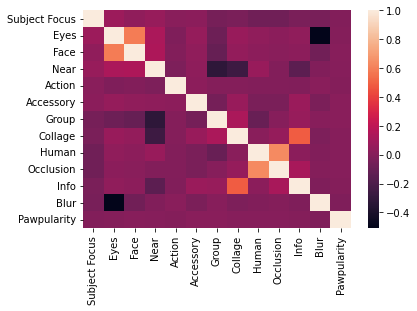

In [7]:
sns.heatmap(corr_matrix)

In [8]:
train_data['image_path'] = train_data['Id'].apply(lambda x: './/dataset//train//{}.jpg'.format(x))

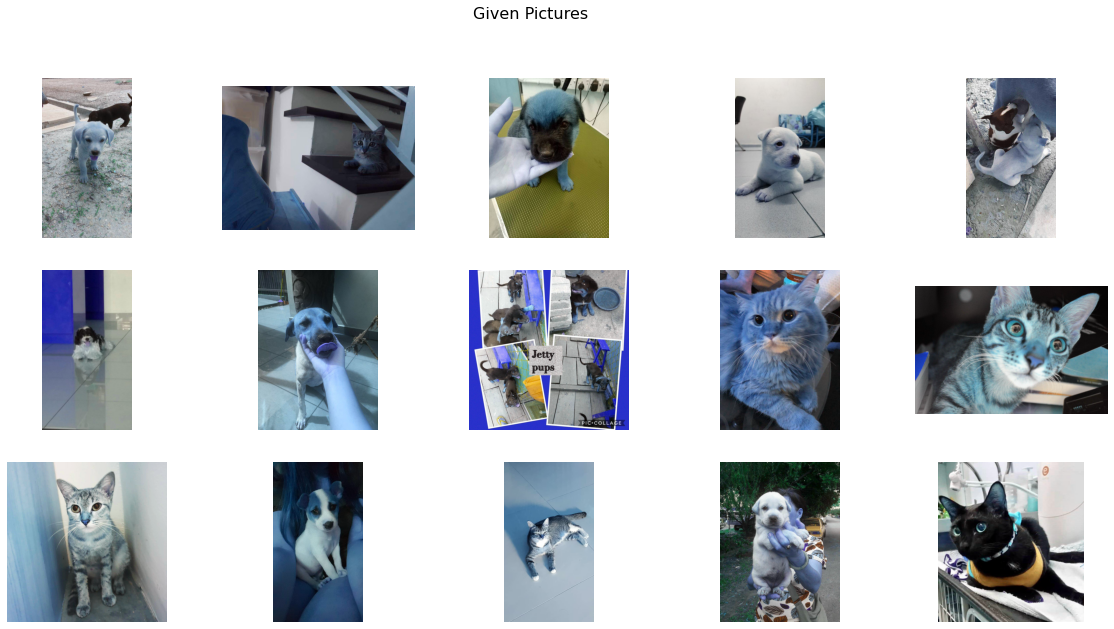

In [10]:
fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (20,10))
plt.suptitle("Given Pictures", fontsize = 16)

for i in range(0,15):
    image = cv2.imread(train_data.loc[i,'image_path'])
    image = cv2.cvtColor(image, 0)
        
    x = i//5
    y = i%5
        
    axes[x, y].imshow(image, cmap = plt.cm.bone)
    axes[x, y].axis('off')